# <span style="color:purple">Yoga Studios in Toronto</span>


## Business Problem:
Both Toronto and and New York City are densely populated cities filled with different shops, parks, and main attractions.
A client is interested in opening a yoga studio and wants to find the city with the least amount of yoga studios. That way competition is minimal. 

## 1. Import libraries 

In [1]:
# import the library we use to open URLs
import urllib.request
import numpy as np

## 2. Scrap data from Wikipedia page into a DataFrame


In [2]:
# specify which URL/web page we are going to be scraping
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [3]:
# open the url using urllib.request and put the HTML into the page variable
page=urllib.request.urlopen(url)

In [4]:
#Import Beautiful Soup
from bs4 import BeautifulSoup


In [5]:
# parse the HTML from our URL into the BeautifulSoup parse tree format
soup=BeautifulSoup(page, "lxml")

In [6]:
#html
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b6928b0a-c33c-4c16-9dca-a680f600278b","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":979555370,"wgRevisionId":979555370,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Communicati

In [7]:
soup.title
soup.title.string

'List of postal codes of Canada: M - Wikipedia'

In [ ]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable
all_tables=soup.find_all("table")
all_tables

In [9]:
right_table=soup.find('table', class_='wikitable sortable')
right_table

<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor, Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park, Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue, Humber Valley Village
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern, Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3B
</td>
<td

In [10]:
#Use find_all again to search each row for <td> tags with the ‘td’ string. Then we will make sure that there are 3 items in our ‘cells’ array (Bourough, Postal code, Neighborhood).
#If there are then we use the find(text=True)) option to extract the content string from within each <td> element in that row and add them to the 3 lists we created at the start of this step. 
postalcode=[]
borough=[]
neighborhood=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        postalcode.append(cells[0].find(text=True))
        borough.append(cells[1].find(text=True))
        neighborhood.append(cells[2].find(text=True))

In [11]:
#Assign
#create a new DataFrame from the three lists

import pandas as pd
df=pd.DataFrame(postalcode,columns=['Postal Code'])
df['Borough']=borough
df['Neighborhood']=neighborhood
df

,Postal Code,Borough,Neighborhood
0,M1A\n,Not assigned\n,Not assigned\n
1,M2A\n,Not assigned\n,Not assigned\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"
...,...,...,...
175,M5Z\n,Not assigned\n,Not assigned\n
176,M6Z\n,Not assigned\n,Not assigned\n
177,M7Z\n,Not assigned\n,Not assigned\n
178,M8Z\n,Etobicoke\n,"Mimico NW, The Queensway West, South of Bloor,..."


In [12]:
#Remove /n
df = df.replace('\n','', regex=True)
df

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


## 3. Drop cells with a borough that is "Not assigned"


In [13]:
df=df[df.Borough != 'Not assigned']
df.reset_index(drop=True)
df.sort_values("Borough", axis = 0, ascending = True, inplace = True, na_position ='first') 
df

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Postal Code,Borough,Neighborhood
138,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest..."
120,M4S,Central Toronto,Davisville
129,M4T,Central Toronto,"Moore Park, Summerhill East"
103,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park"
112,M5R,Central Toronto,"The Annex, North Midtown, Yorkville"
...,...,...,...
86,M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn"
23,M6C,York,Humewood-Cedarvale
32,M6E,York,Caledonia-Fairbanks
98,M9N,York,Weston


## 4. Group neighborhoods in the same borough


In [14]:
dfgroup= df.groupby(["Postal Code", "Borough"], as_index=False).agg(lambda x: ", ".join(x))
df.sort_values("Neighborhood",axis=0, ascending=False)
df.head()

,Postal Code,Borough,Neighborhood
138,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest..."
120,M4S,Central Toronto,Davisville
129,M4T,Central Toronto,"Moore Park, Summerhill East"
103,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park"
112,M5R,Central Toronto,"The Annex, North Midtown, Yorkville"


## 5. For Neighborhood not assigned, make the value the same as Borough


In [15]:
df.loc[df['Neighborhood'] == 'Not assigned', 'Neighborhood'] = 'Bourough'
df

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Postal Code,Borough,Neighborhood
138,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest..."
120,M4S,Central Toronto,Davisville
129,M4T,Central Toronto,"Moore Park, Summerhill East"
103,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park"
112,M5R,Central Toronto,"The Annex, North Midtown, Yorkville"
...,...,...,...
86,M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn"
23,M6C,York,Humewood-Cedarvale
32,M6E,York,Caledonia-Fairbanks
98,M9N,York,Weston


## 6. Check whether it is the same as required from question


In [16]:
#Create test data frame
dftest = pd.DataFrame(columns=['Postal Code', 'Borough', 'Neighborhood'])

finalList = ["M5G", "M2H", "M4B", "M1J", "M4G", "M4M", "M1R", "M9V", "M9L", "M5V", "M1B", "M5A"]

for postalcode in finalList:
    dftest = dftest.append(dfgroup[dfgroup["Postal Code"]==postalcode], ignore_index=True)

dftest

,Postal Code,Borough,Neighborhood
0,M5G,Downtown Toronto,Central Bay Street
1,M2H,North York,Hillcrest Village
2,M4B,East York,"Parkview Hill, Woodbine Gardens"
3,M1J,Scarborough,Scarborough Village
4,M4G,East York,Leaside
5,M4M,East Toronto,Studio District
6,M1R,Scarborough,"Wexford, Maryvale"
7,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."
8,M9L,North York,Humber Summit
9,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har..."


## 7. Print the number of rows in the dataframe

In [17]:
#Print Shape
df.shape

(103, 3)

# <span style="color:purple"> Part 2 Segmenting and Clustering Neighborhoods in Toronto</span>.



## 8. Import libraries and load CSV data file

In [18]:
#import Geospatial Coordinates 
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_abf03fd7a4c34ec9800d4916e6f767f9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='NnG89jNKWg9FLgzdqw4JsmBiL2nrXTwU83Po6nYwxeX2',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_abf03fd7a4c34ec9800d4916e6f767f9.get_object(Bucket='courseracapstone-donotdelete-pr-h4dcjsvded2qhj',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dfdata = pd.read_csv(body)
dfdata.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


## 9. Merge both data tables

In [19]:
#Merge data
df_merge = dfgroup.merge(dfdata, how= 'left', on=['Postal Code'])
df_merge.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


## 10. check to make sure the coordinates are added as required

In [20]:
#Create new test data frame 
column_names = ["Postal Code", "Borough", "Neighborhood", "Latitude", "Longitude"]
dftest = pd.DataFrame(columns=column_names)

finalList = ["M5G", "M2H", "M4B", "M1J", "M4G", "M4M", "M1R", "M9V", "M9L", "M5V", "M1B", "M5A"]

for postalcode in finalList:
    dftest = dftest.append(df_merge[df_merge["Postal Code"]==postalcode], ignore_index=True)

dftest

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
1,M2H,North York,Hillcrest Village,43.803762,-79.363452
2,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
3,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
4,M4G,East York,Leaside,43.709060,-79.363452
5,M4M,East Toronto,Studio District,43.659526,-79.340923
6,M1R,Scarborough,"Wexford, Maryvale",43.750072,-79.295849
7,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437
8,M9L,North York,Humber Summit,43.756303,-79.565963
9,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420


# <span style="color:purple"> Part 3 Segmenting and Clustering Neighborhoods in Toronto</span>.



## 11. Import libaries 

In [21]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 79 kB 8.1 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=c0368b07f895b07980bc21206f7e3641ece317c9d52dfa06962b1fc438a923fb
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed
Libraries imported.


## 12. Use the Foursquare API for neighborhoods

In [22]:
CLIENT_ID = 'VVQUHIRJ413FX1TCRGCQWBB55EOVQTBUIG0YHS1LIJSWJRYX' # your Foursquare ID
CLIENT_SECRET = 'KATK2GVPOM4HY4C1YCRIUVU1JRIWO00MGX10O3GIJZPIASJP' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VVQUHIRJ413FX1TCRGCQWBB55EOVQTBUIG0YHS1LIJSWJRYX
CLIENT_SECRET:KATK2GVPOM4HY4C1YCRIUVU1JRIWO00MGX10O3GIJZPIASJP


## 13. Use geopy library to test and get the coordinates of Downtown Toronto


In [23]:
address = 'Downtown Toronto'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6563221 -79.3809161


In [24]:
#print columns to make sure all columns are accounted for 
for col in df_merge.columns: 
    print(col) 

Postal Code
Borough
Neighborhood
Latitude
Longitude


## 14. Check how many Boroughs and Neighboorhoods the data frame has

In [25]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_merge['Borough'].unique()),
        df_merge.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


# 15. Create map of Toronto using latitude and longitude values


In [26]:
# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Borough'], df_merge['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_toronto)  
    
map_toronto

In [27]:
#create a new DataFrame with only boroughs that contain the word Toronto
df_merge=df_merge[df_merge['Borough'].str.contains("Toronto")]
df_merge.shape


(39, 5)

In [28]:
# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Borough'], df_merge['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_toronto)  
    
map_toronto

## 16. Use the Foursquare API for neighborhoods

In [29]:
CLIENT_ID = 'VVQUHIRJ413FX1TCRGCQWBB55EOVQTBUIG0YHS1LIJSWJRYX' # your Foursquare ID
CLIENT_SECRET = 'KATK2GVPOM4HY4C1YCRIUVU1JRIWO00MGX10O3GIJZPIASJP' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VVQUHIRJ413FX1TCRGCQWBB55EOVQTBUIG0YHS1LIJSWJRYX
CLIENT_SECRET:KATK2GVPOM4HY4C1YCRIUVU1JRIWO00MGX10O3GIJZPIASJP


## 17.Get the top 100 venues that are within 500 meters



In [30]:
radius = 500
LIMIT = 100

venues = []

for lat, long, post, borough, neighborhood in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Postal Code'], df_merge['Borough'], df_merge['Neighborhood']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            post, 
            borough,
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [31]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Postal Code', 'Borough', 'Neighborhood', 'BoroughLatitude', 'BoroughLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1624, 9)


,Postal Code,Borough,Neighborhood,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,M4E,East Toronto,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,M4E,East Toronto,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [32]:
venues_df.groupby(["Postal Code", "Borough", "Neighborhood"]).count()


,,,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Postal Code,Borough,Neighborhood,,,,,,
M4E,East Toronto,The Beaches,4,4,4,4,4,4
M4K,East Toronto,"The Danforth West, Riverdale",43,43,43,43,43,43
M4L,East Toronto,"India Bazaar, The Beaches West",19,19,19,19,19,19
M4M,East Toronto,Studio District,37,37,37,37,37,37
M4N,Central Toronto,Lawrence Park,3,3,3,3,3,3
M4P,Central Toronto,Davisville North,9,9,9,9,9,9
M4R,Central Toronto,"North Toronto West, Lawrence Park",18,18,18,18,18,18
M4S,Central Toronto,Davisville,33,33,33,33,33,33
M4T,Central Toronto,"Moore Park, Summerhill East",2,2,2,2,2,2


## 18. Get unique categories 

In [33]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))


There are 235 uniques categories.


In [34]:
venues_df['VenueCategory'].unique()
venues_df.sort_values('VenueCategory', ascending=False).head(15)

,Postal Code,Borough,Neighborhood,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
1444,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,YogaSpace,43.647607,-79.420133,Yoga Studio
1582,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,The Yoga Sanctuary,43.661499,-79.383636,Yoga Studio
619,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,The Yoga Sanctuary,43.661499,-79.383636,Yoga Studio
277,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,The Yoga Sanctuary,43.661499,-79.383636,Yoga Studio
1094,M5S,Downtown Toronto,"University of Toronto, Harbord",43.662696,-79.400049,Sivananda Yoga Centre,43.662754,-79.402951,Yoga Studio
115,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,Barreworks,43.714070,-79.400109,Yoga Studio
11,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,Moksha Yoga Danforth,43.677622,-79.352116,Yoga Studio
1572,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450,(The New) Moksha Yoga Bloor West,43.648658,-79.485242,Yoga Studio
267,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,Bikram Yoga Yonge,43.668205,-79.385780,Yoga Studio
1266,M5W,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,Bikram Yoga Centre,43.649214,-79.375229,Yoga Studio


In [35]:
#Filtering the data frame to show all the yoga studios in the area and how many
df_filter=venues_df.VenueCategory.str.contains('Yoga')
print(venues_df[df_filter].shape)
venues_df[df_filter]

(12, 9)


,Postal Code,Borough,Neighborhood,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
11,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,Moksha Yoga Danforth,43.677622,-79.352116,Yoga Studio
91,M4M,East Toronto,Studio District,43.659526,-79.340923,Spirit Loft Yoga,43.663548,-79.341333,Yoga Studio
115,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678,Barreworks,43.714070,-79.400109,Yoga Studio
267,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,Bikram Yoga Yonge,43.668205,-79.385780,Yoga Studio
277,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,The Yoga Sanctuary,43.661499,-79.383636,Yoga Studio
335,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,The Yoga Lounge,43.655515,-79.364955,Yoga Studio
619,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,The Yoga Sanctuary,43.661499,-79.383636,Yoga Studio
1094,M5S,Downtown Toronto,"University of Toronto, Harbord",43.662696,-79.400049,Sivananda Yoga Centre,43.662754,-79.402951,Yoga Studio
1266,M5W,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,Bikram Yoga Centre,43.649214,-79.375229,Yoga Studio
1444,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,YogaSpace,43.647607,-79.420133,Yoga Studio


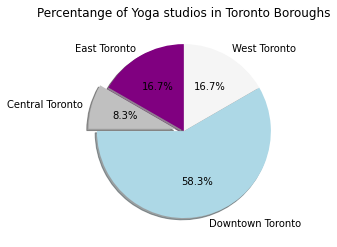

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

my_data = [2, 1 , 7, 2]
my_labels = ['East Toronto', 'Central Toronto', 'Downtown Toronto', 'West Toronto']
colors=('purple', 'silver', 'lightblue', 'whitesmoke')
plt.pie(my_data,
        labels=my_labels,
        colors=colors,
        startangle=90,
        shadow= True,
        explode=(0,0.1,0,0),
        autopct='%1.1f%%')
#plt.pie(my_data,labels=my_labels ,autopct='%1.1f%%', colors=colors, radius=radius)
plt.title('Percentange of Yoga studios in Toronto Boroughs')
plt.show()


## 19. Analyze each area 

## Conclusion
To answer the business problem, Toronto would be the best city to open a yoga studio. Specifically, Central Toronto. 
This project is relevant to stakeholders that are interested in expanding and maximizing their investments. Less competition in certain areas brings a high chance of new clients.